Bike Rental Service Analysis 

In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("day.csv")
data1 = pd.read_csv("hour.csv")

In [5]:
print(data.head())
print(data1.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

Hour.csv is at a more granular level than day.csv and will be used for better insights. 

Distribution of Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002E32F91B8D0>,
      dtype=object)

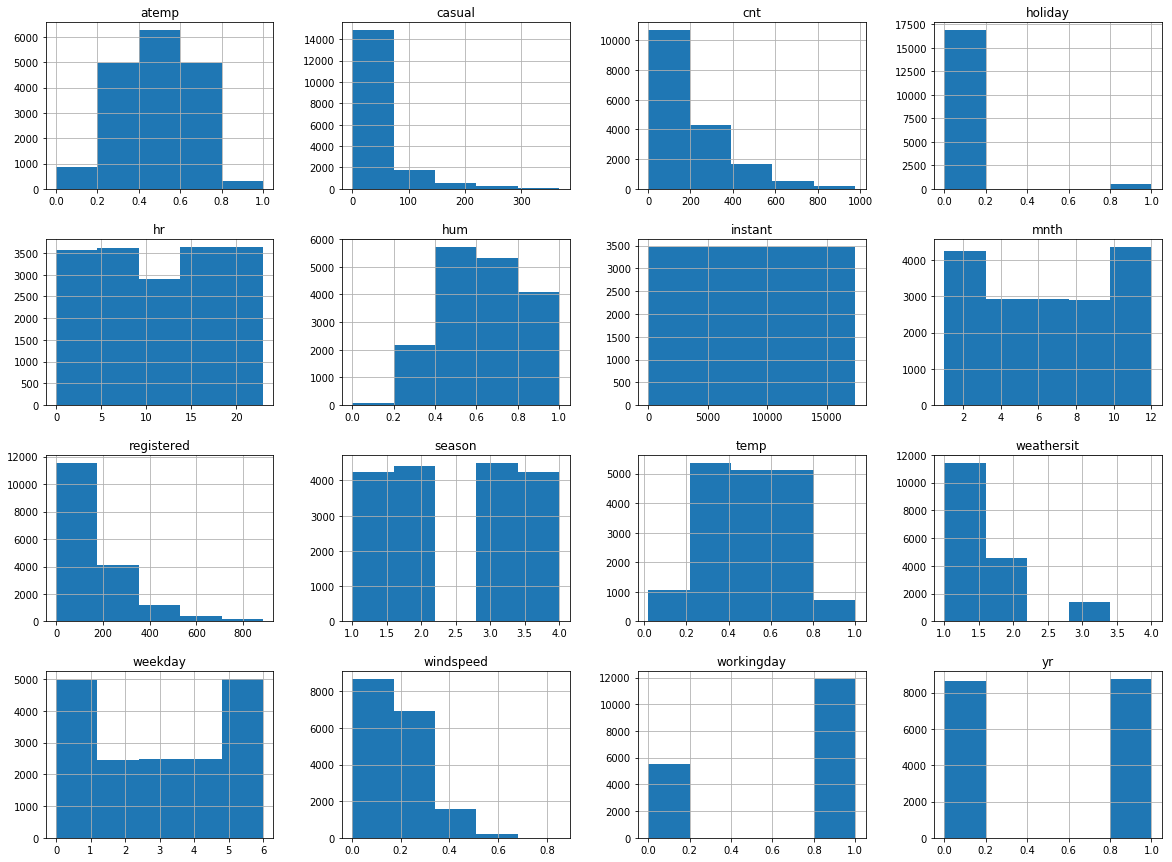

In [6]:
data1.hist(bins=5,figsize=(20,15))

Transformations are not required for the data set as the dataset doen't have a skew, for most variables.

In [7]:
data1.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Data is clean and does not require any cleaning.

In [7]:
data1.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


From the given dataset, there are two vaues which can be predicted-The number of casual users who will use the service or the number of registered users who will use the service.
Time series analysis or regression based models can be run, for these predictions. Let us run different regression models to understand which variables effect the number of users.
For running regression model, let us preprocess the data

In [8]:
month = pd.get_dummies(data1['mnth'],drop_first=True,prefix=['Month'])
weekday = pd.get_dummies(data1['weekday'],drop_first=True,prefix=['weekday'])
weathersit=pd.get_dummies(data1['weathersit'],drop_first=True,prefix=['weathersit'])
season=pd.get_dummies(data1['season'],drop_first=True,prefix=['season'])

In [9]:
df=data1

In [10]:
df.drop(['mnth', 'weekday','weathersit','season'],axis=1,inplace=True)
df = pd.concat([df,month,weekday,weathersit,season],axis=1)
df.head()

,instant,dteday,yr,hr,holiday,workingday,temp,atemp,hum,windspeed,...,['weekday']_3,['weekday']_4,['weekday']_5,['weekday']_6,['weathersit']_2,['weathersit']_3,['weathersit']_4,['season']_2,['season']_3,['season']_4
0,1,2011-01-01,0,0,0,0,0.24,0.2879,0.81,0.0,...,0,0,0,1,0,0,0,0,0,0
1,2,2011-01-01,0,1,0,0,0.22,0.2727,0.80,0.0,...,0,0,0,1,0,0,0,0,0,0
2,3,2011-01-01,0,2,0,0,0.22,0.2727,0.80,0.0,...,0,0,0,1,0,0,0,0,0,0
3,4,2011-01-01,0,3,0,0,0.24,0.2879,0.75,0.0,...,0,0,0,1,0,0,0,0,0,0
4,5,2011-01-01,0,4,0,0,0.24,0.2879,0.75,0.0,...,0,0,0,1,0,0,0,0,0,0


In [11]:
df.columns

Index(['instant', 'dteday', 'yr', 'hr', 'holiday', 'workingday', 'temp',
       'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       '['Month']_2', '['Month']_3', '['Month']_4', '['Month']_5',
       '['Month']_6', '['Month']_7', '['Month']_8', '['Month']_9',
       '['Month']_10', '['Month']_11', '['Month']_12', '['weekday']_1',
       '['weekday']_2', '['weekday']_3', '['weekday']_4', '['weekday']_5',
       '['weekday']_6', '['weathersit']_2', '['weathersit']_3',
       '['weathersit']_4', '['season']_2', '['season']_3', '['season']_4'],
      dtype='object')

In [12]:
X_data1 = df.iloc[:,2:10]
X_data1.head()

,yr,hr,holiday,workingday,temp,atemp,hum,windspeed
0,0,0,0,0,0.24,0.2879,0.81,0.0
1,0,1,0,0,0.22,0.2727,0.80,0.0
2,0,2,0,0,0.22,0.2727,0.80,0.0
3,0,3,0,0,0.24,0.2879,0.75,0.0
4,0,4,0,0,0.24,0.2879,0.75,0.0


In [13]:
X_data2 = df.iloc[:,13:36]
X_data2.head()

,['Month']_2,['Month']_3,['Month']_4,['Month']_5,['Month']_6,['Month']_7,['Month']_8,['Month']_9,['Month']_10,['Month']_11,...,['weekday']_3,['weekday']_4,['weekday']_5,['weekday']_6,['weathersit']_2,['weathersit']_3,['weathersit']_4,['season']_2,['season']_3,['season']_4
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [14]:
X_data = pd.concat([X_data1,X_data2],axis=1)
X_data.head()

,yr,hr,holiday,workingday,temp,atemp,hum,windspeed,['Month']_2,['Month']_3,...,['weekday']_3,['weekday']_4,['weekday']_5,['weekday']_6,['weathersit']_2,['weathersit']_3,['weathersit']_4,['season']_2,['season']_3,['season']_4
0,0,0,0,0,0.24,0.2879,0.81,0.0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0.22,0.2727,0.80,0.0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,2,0,0,0.22,0.2727,0.80,0.0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,3,0,0,0.24,0.2879,0.75,0.0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,4,0,0,0.24,0.2879,0.75,0.0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [15]:
Y_data = df.iloc[:,11]
Y_data.head()

0    13
1    32
2    27
3    10
4     1
Name: registered, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, shuffle = True, test_size = 0.30, random_state=42)

knn Regressor

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
knnScoring =  'r2'
param_grid = {"n_neighbors":[1,3,5,7,10,13,15,20]}
knnr = KNeighborsRegressor()

grid_knnr = GridSearchCV(estimator = knnr, param_grid = param_grid, cv = 10, scoring = knnScoring, n_jobs=-1)
grid_knnr.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 10, 13, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [18]:
print(grid_knnr.best_estimator_.n_neighbors)
print(grid_knnr.best_score_)

5
0.8649421842329603


In [19]:
print(grid_knnr.score(X_train, y_train)) 
print(grid_knnr.score(X_test, y_test))

0.9172308495643157
0.8830426720092813


Linear Regression

In [20]:
from sklearn import linear_model

lin_mod = linear_model.LinearRegression(fit_intercept = True)
lin_mod.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
print(lin_mod.score(X_train, y_train))
print(lin_mod.score(X_test, y_test))

0.34995134939699246
0.34068820742793604


SGD Regressor

In [22]:
from sklearn.linear_model import SGDRegressor
param_grid = {"max_iter":[1,10,100,1000,10000], "penalty":['l1','l2']}

sgd_clf = SGDRegressor(random_state=0, learning_rate = 'optimal')
grid_sgd = GridSearchCV(estimator = sgd_clf, param_grid = param_grid, cv = 10, scoring = 'r2')
grid_sgd.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='optimal',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=0, shuffle=True, tol=None, verbose=0,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_iter': [1, 10, 100, 1000, 10000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [23]:
print(grid_sgd.best_score_)
print(grid_sgd.best_params_)

-26934.66718123114
{'max_iter': 10000, 'penalty': 'l2'}


In [24]:
print(grid_sgd.score(X_train, y_train))
print(grid_sgd.score(X_test, y_test))

-473.8350208278186
-590.5102567858826


Ridge Regression

In [25]:
from  sklearn.linear_model import Ridge

param_grid = {"alpha":[1.0/50.0, 1.0/200.0, 1.0/500.0, 1.0/1000.0,.00001]}
grid_ridge = GridSearchCV(estimator = Ridge(), param_grid = param_grid, cv = 10, scoring = 'r2')
grid_ridge.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.02, 0.005, 0.002, 0.001, 1e-05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [26]:
print(grid_ridge.best_score_)
print(grid_ridge.best_params_)

0.3461005181298062
{'alpha': 0.02}


In [27]:
print(grid_ridge.score(X_train, y_train))
print(grid_ridge.score(X_test, y_test))

0.34995134689152496
0.34068956338648115


LASSO Regression

In [28]:
from sklearn.linear_model import Lasso
param_grid = {"alpha":[1.0/50.0, 1.0/200.0, 1.0/500.0, 1.0/1000.0,.00001]}
grid_lasso = GridSearchCV(Lasso(), param_grid = param_grid, cv = 10, scoring = 'r2')

grid_lasso.fit(X_train, y_train)

C:\Users\vishw\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\vishw\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\vishw\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\vishw\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.02, 0.005, 0.002, 0.001, 1e-05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [29]:
print(grid_lasso.best_score_)
print(grid_lasso.best_params_)

0.34610868925309207
{'alpha': 0.002}


In [30]:
print(grid_lasso.score(X_train, y_train))
print(grid_lasso.score(X_test, y_test))

0.3499490498713105
0.34069243646407177


SVR Linear

In [31]:
from sklearn.svm import LinearSVR

param_grid  = {"C": [ 10, 100, 1000], 'epsilon':[0.01,0.1,1,10]}
grid_svl = GridSearchCV(estimator = LinearSVR(), param_grid = param_grid, cv = 10, scoring = 'r2')
grid_svl.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [10, 100, 1000], 'epsilon': [0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [32]:
print(grid_svl.best_score_)
print(grid_svl.best_params_)

0.276396490689534
{'C': 10, 'epsilon': 10}


In [33]:
print(grid_svl.score(X_train, y_train))
print(grid_svl.score(X_test, y_test))

0.27680404156223704
0.2818338274303306


Polynomial Regression

In [34]:
from  sklearn.preprocessing  import PolynomialFeatures

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
r2_train_score_list = []
for n in range(1,4):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    lreg.fit(X_train_poly, y_train)
    r2_train_score_list.append(lreg.score(X_train_poly, y_train))
    
r2_train_score_list

[0.3499513493969926, 0.5029708355716114, 0.6447820252078593]

In [35]:
poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
print(lreg.score(X_train_poly, y_train))
print(lreg.score(X_test_poly, y_test))

0.6447820252078593
-5003154201.697323


Highly over fit of the model due to increasing complexity

Decision Tree Regressor

In [36]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [37]:
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.9999922448691315
0.8890977483684656


From the above models it is very clear that Linear models are not a good fit for the data. Out of the all the models Decision tree regressor is the best. 

There is a high difference between Test and Train score in the decision tree regressor model. This shows overfit of the model. Now let us use an ensemble method to identify if it there can be room for improvement. Bagging is a useful method, and the decision tree's bagging method is the Random forest regressor.  

In [38]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(random_state=42, n_estimators=500)
param_grid = {"max_depth":[2,4,6,8,10]}
grid_regr = GridSearchCV(estimator = regr, param_grid = param_grid, cv = 10, scoring = 'r2')
grid_regr.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 4, 6, 8, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='r2', verbose=0)

In [39]:
print(grid_regr.best_score_)
print(grid_regr.best_params_)

0.9195915516219516
{'max_depth': 10}


In [40]:
print(grid_regr.score(X_train, y_train))
print(grid_regr.score(X_test, y_test))

0.9460561501985332
0.9218903359953632


Using a bagging ensemble technique such as Random forest, there is an increase in accuracy for test score which means the decison tree 

Importance of Each feature:

In [41]:
regr = RandomForestRegressor(random_state=42, n_estimators=500,max_depth=10)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [42]:
print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))

0.9460561501985332
0.9218903359953632


In [43]:
regr.feature_importances_

array([9.41994471e-02, 5.97674957e-01, 8.01863171e-04, 1.50766378e-01,
       5.53474340e-02, 3.93799349e-02, 1.42191097e-02, 2.94476442e-03,
       4.96297495e-04, 9.46317840e-04, 6.98338127e-04, 4.72635838e-04,
       1.64627576e-04, 9.71419478e-05, 5.85884026e-05, 1.68145088e-03,
       1.21121790e-03, 3.91642553e-04, 1.29475842e-03, 1.91918424e-03,
       3.08698114e-04, 4.92811124e-04, 9.14798396e-04, 3.23699123e-03,
       7.72689424e-04, 4.33703623e-04, 1.52580515e-02, 4.18092627e-07,
       7.80905430e-04, 3.01122894e-04, 1.27337202e-02])

<IPython.core.display.Javascript object>


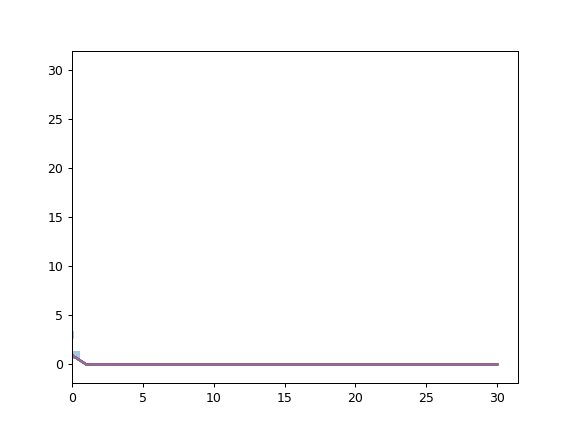

<Container object of 31 artists>

In [55]:
%matplotlib notebook

y_list = regr.feature_importances_
y_pos = np.arange(len(y_list))
plt.barh(y_pos, y_list, align='center', alpha=0.4)

Some of the important features of the model are:
Year
Holiday
WorkingDay
Temp
atemp
Humidity
Wind Speed

Dimensionality Reduction

In [62]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 31)

X_pca_data = pca.fit_transform(X_data)

In [63]:
variance_ratio=pca.explained_variance_ratio_
variance_ratio

array([9.40641944e-01, 6.89187271e-03, 6.41613433e-03, 6.21149925e-03,
       4.93083759e-03, 3.87101865e-03, 2.87148492e-03, 2.85046106e-03,
       2.81012915e-03, 2.80470992e-03, 2.76988273e-03, 1.77547787e-03,
       1.69685571e-03, 1.67774161e-03, 1.66530497e-03, 1.65340790e-03,
       1.63655569e-03, 1.61013778e-03, 1.41017927e-03, 1.24504915e-03,
       5.89669925e-04, 5.18703509e-04, 4.88237446e-04, 2.79631236e-04,
       2.42705881e-04, 2.28345555e-04, 1.66352775e-04, 3.56291541e-05,
       6.65600894e-06, 3.38407285e-06, 1.85508914e-31])

<IPython.core.display.Javascript object>


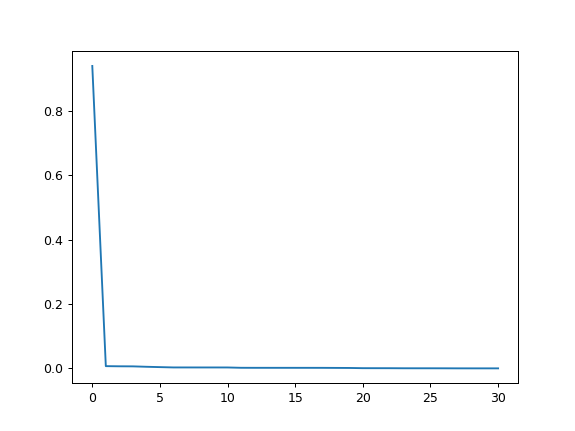

In [96]:
%matplotlib notebook

plt.plot(variance_ratio)

It is clear that 2 PC are enough for the given model. Let us now analyze if it works better on the decision tree regressor.

In [100]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_pca_data = pca.fit_transform(X_data)

In [102]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca_data, Y_data, shuffle = True, test_size = 0.30, random_state=42)

In [104]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=10)
dt.fit(X_pca_train, y_pca_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [105]:
print(dt.score(X_pca_train, y_pca_train))
print(dt.score(X_pca_test, y_pca_test))

0.7420567499980875
0.6378683567710806


Since we can see that PCA doesn't improve the model, we can conclude that Dimensionality Reduction is proabably not important for this model.